In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('audit_risk.csv')

In [4]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [5]:
df.shape

(776, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [7]:
df['Risk'].value_counts() 
#The outcome variable is not continuous but has only 2 classes. 
#This is therefore a classification problem

0    471
1    305
Name: Risk, dtype: int64

In [8]:
df['LOCATION_ID'].value_counts(sort=True) 

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64

In [9]:
#The non numeric values in this column are only 3, removing them will therefore do no harm
df = df[pd.to_numeric(df['LOCATION_ID'], errors='coerce').notnull()]
df = df.astype({'LOCATION_ID':'int'})

In [10]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [11]:
df.info() #Our dataframe does not also have any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    773 non-null    float64
 1   LOCATION_ID     773 non-null    int64  
 2   PARA_A          773 non-null    float64
 3   Score_A         773 non-null    float64
 4   Risk_A          773 non-null    float64
 5   PARA_B          773 non-null    float64
 6   Score_B         773 non-null    float64
 7   Risk_B          773 non-null    float64
 8   TOTAL           773 non-null    float64
 9   numbers         773 non-null    float64
 10  Score_B.1       773 non-null    float64
 11  Risk_C          773 non-null    float64
 12  Money_Value     772 non-null    float64
 13  Score_MV        773 non-null    float64
 14  Risk_D          773 non-null    float64
 15  District_Loss   773 non-null    int64  
 16  PROB            773 non-null    float64
 17  RiSk_E          773 non-null    flo

In [12]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


- There are no categorical variables too, so no need for dummy variable creation

In [13]:
df.shape

(773, 27)

In [14]:
df = df.dropna()

In [15]:
df.shape

(772, 27)

In [16]:
df.corr()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.057494,-0.217724,-0.427975,-0.219995,-0.133234,-0.220443,-0.131142,-0.153966,-0.152502,...,-0.129340,-0.115293,-0.137511,-0.103665,-0.339585,-0.174041,-0.155790,NaN,-0.092368,-0.396591
LOCATION_ID,-0.057494,1.000000,-0.004792,0.082383,-0.002633,0.007476,0.127539,0.007089,0.007574,0.007817,...,-0.099002,-0.080681,-0.052949,-0.088032,0.089858,-0.045398,-0.125223,NaN,-0.085598,0.062601
PARA_A,-0.217724,-0.004792,1.000000,0.496187,0.999267,0.161610,0.357831,0.161512,0.266706,0.133373,...,0.118261,0.117962,0.172257,0.103694,0.426005,0.481577,0.148577,NaN,0.219518,0.378008
Score_A,-0.427975,0.082383,0.496187,1.000000,0.504378,0.248984,0.571429,0.247752,0.297051,0.242054,...,0.101070,0.177411,0.264772,0.150441,0.719458,0.320291,0.169519,NaN,0.201458,0.618348
Risk_A,-0.219995,-0.002633,0.999267,0.504378,1.000000,0.164952,0.362238,0.164816,0.269882,0.135192,...,0.117947,0.120810,0.175776,0.106271,0.431838,0.483005,0.150144,NaN,0.221337,0.384304
PARA_B,-0.133234,0.007476,0.161610,0.248984,0.164952,1.000000,0.347265,0.999936,0.994102,0.209630,...,0.078979,0.203407,0.316353,0.195892,0.396977,0.654349,0.186370,NaN,0.887775,0.256591
Score_B,-0.220443,0.127539,0.357831,0.571429,0.362238,0.347265,1.000000,0.347865,0.378970,0.277058,...,0.013929,0.200412,0.309058,0.170875,0.901051,0.365146,0.126680,NaN,0.207618,0.634784
Risk_B,-0.131142,0.007089,0.161512,0.247752,0.164816,0.999936,0.347865,1.000000,0.994025,0.209376,...,0.079326,0.202652,0.316192,0.195139,0.396788,0.654405,0.186079,NaN,0.887551,0.254865
TOTAL,-0.153966,0.007574,0.266706,0.297051,0.269882,0.994102,0.378970,0.994025,1.000000,0.217382,...,0.088725,0.210553,0.326181,0.201981,0.433590,0.689657,0.196924,NaN,0.888083,0.291515
numbers,-0.152502,0.007817,0.133373,0.242054,0.135192,0.209630,0.277058,0.209376,0.217382,1.000000,...,0.136494,0.202121,0.209340,0.202203,0.502699,0.270831,0.228269,NaN,0.221281,0.307642


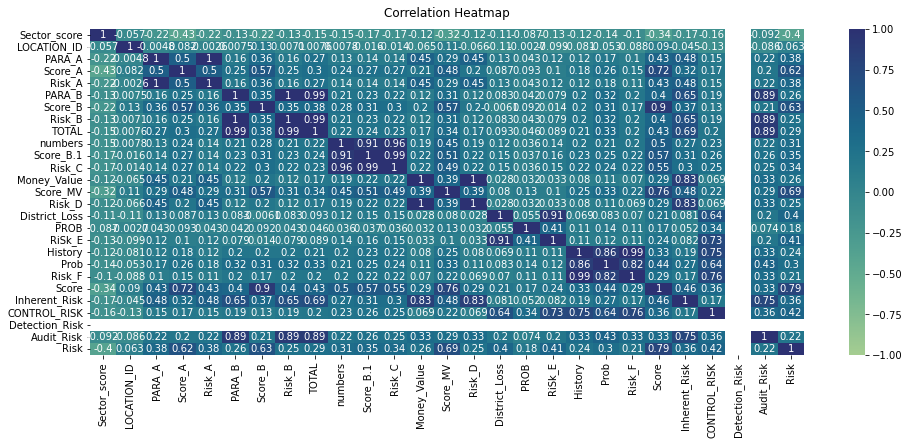

In [17]:
#Let us visualize this 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## X-Y Split

In [18]:
x = df.loc[:,df.columns != "Risk"]

In [19]:
y = df['Risk']

In [20]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
x.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


In [22]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Risk, dtype: int64

## Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
x_train.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
766,55.57,8,0.80,0.2,0.160,0.57,0.2,0.114,1.37,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.674,0.4,0.5,0.3348
421,1.85,16,3.67,0.6,2.202,0.18,0.2,0.036,3.85,5.0,...,0.2,0.4,0,0.2,0.0,2.4,3.638,0.4,0.5,0.7276
118,3.41,39,3.63,0.6,2.178,10.85,0.4,4.340,14.48,5.0,...,0.2,0.4,0,0.2,0.0,3.0,7.974,0.4,0.5,1.5948
252,2.72,9,0.96,0.2,0.192,0.00,0.2,0.000,0.96,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.592,0.4,0.5,0.3184
157,3.41,40,10.37,0.6,6.222,105.56,0.6,63.336,115.93,9.0,...,0.2,0.4,0,0.2,0.0,4.8,106.636,0.4,0.5,21.3272


In [26]:
x_train.shape

(617, 26)

In [27]:
x_test.shape

(155, 26)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler().fit(x_train)

In [30]:
x_train_std = sc.transform(x_train)

In [31]:
x_test_std = sc.transform(x_test)

## Model Training

In [32]:
from sklearn.ensemble import RandomForestClassifier #Model to be used
from sklearn.model_selection import cross_val_score #for K-fold cross validation
from sklearn.metrics import accuracy_score #To check the model accuracy

In [33]:
rf_clf = RandomForestClassifier()

In [34]:
rf_clf.fit(x_train_std, y_train)

RandomForestClassifier()

In [35]:
accuracy_score(y_test, rf_clf.predict(x_test_std))

1.0

In [36]:
score_rf =cross_val_score(rf_clf, x_train_std, y_train,cv=10)
print(score_rf)
print("Avg: {}".format(np.average(score_rf)))

[0.98387097 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Avg: 0.9983870967741936


Text(0.5, 0, 'score')

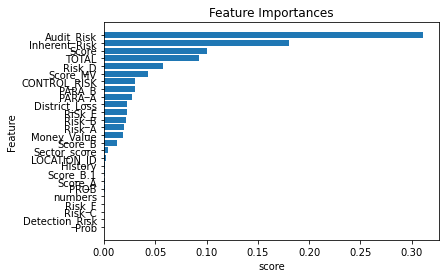

In [37]:
sorted_idx = rf_clf.feature_importances_.argsort()
plt.barh(list(x.columns[sorted_idx]), rf_clf.feature_importances_[sorted_idx])
plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('score')

### Random Forest Grid-Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
rf_clf = RandomForestClassifier(random_state = 42)

In [40]:
params_grid = {"n_estimators": [250, 500, 750, 1000],
               "max_features" : [4,5,6,7,8,9,10],
              "min_samples_split" : [2,3,10],
              }

In [41]:
grid_search = GridSearchCV(rf_clf, params_grid, 
                          n_jobs = -1, cv = 10, scoring = 'accuracy')

In [42]:
grid_search.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [250, 500, 750, 1000]},
             scoring='accuracy')

In [43]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2, 'n_estimators': 250}

In [44]:
cvrf_clf = grid_search.best_estimator_

In [45]:
accuracy_score(y_test, cvrf_clf.predict(x_test_std)) #Accuracy from seperate test set

1.0

In [46]:
score_rf_gc=cross_val_score(cvrf_clf, x_train_std, y_train,cv=10)
print(score_rf_gc)
print("Avg: {}".format(np.average(score_rf_gc))) #Results from cross validation

[0.98387097 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
Avg: 0.9983870967741936


Text(0.5, 0, 'score')

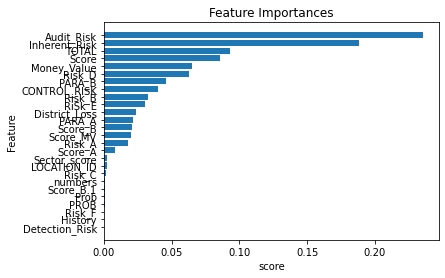

In [47]:
sorted_idx = cvrf_clf.feature_importances_.argsort()
plt.barh(list(x.columns[sorted_idx]), cvrf_clf.feature_importances_[sorted_idx])
plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('score')

## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [50]:
params_grid = {"n_neighbors": [2,3,4,5],
               "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "p" : [1,2],
              }

In [51]:
grid_search = GridSearchCV(knn, params_grid, 
                          n_jobs = -1, cv = 10, scoring = 'accuracy')

In [52]:
grid_search.fit(x_train_std, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5], 'p': [1, 2]},
             scoring='accuracy')

In [53]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1}

In [54]:
cvrf_clf = grid_search.best_estimator_

In [55]:
accuracy_score(y_test, cvrf_clf.predict(x_test_std)) #Accuracy from seperate test set

0.9741935483870968

In [56]:
score_rf_gc=cross_val_score(cvrf_clf, x_train_std, y_train,cv=10)
print(score_rf_gc)
print("Avg: {}".format(np.average(score_rf_gc))) #Results from cross validation

[0.96774194 0.9516129  0.98387097 0.96774194 0.93548387 1.
 0.9516129  0.91803279 0.98360656 0.96721311]
Avg: 0.9626916975145428


## XGBoost

In [57]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_clf = xgb.XGBClassifier(random_state = 42)

In [ ]:
param_test1 = {
    'max_depth' : range(3,10,2),
    'gamma' : [0.1, 0.2, 0.3],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9],
    'reg_alpha' : [1e-2, 0.1, 1]
}

In [ ]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                          n_jobs = -1, cv = 10, scoring = 'accuracy')

In [ ]:
grid_search.fit(x_train_std, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
cvrf_clf = grid_search.best_estimator_

In [ ]:
accuracy_score(y_test, cvrf_clf.predict(x_test_std)) #Accuracy from seperate test set

In [ ]:
score_rf_gc=cross_val_score(cvrf_clf, x_train_std, y_train,cv=10)
print(score_rf_gc)
print("Avg: {}".format(np.average(score_rf_gc))) #Results from cross validation